## FireProtDB - ddG Target Class (Multiclass classification) - Decision Tree Classifier ##

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

print("Setup Complete")

Setup Complete


In [15]:
ddG_df = pd.read_csv('Apr10FireProtDB_FeatGen_targetclass.csv')
ddG_df = ddG_df.dropna()
ddG_df = ddG_df.drop(['protein_name',
                      'uniprot_id',
                      'ddG',
                      'secondary_structure',
                      'sequence',
                      'MEC',
                      'Aliphatic Index'], axis=1)
y = ddG_df['target_class']
X = ddG_df.drop(['target_class'], axis=1)

## Test size 20% ##

In [6]:
y = ddG_df['target_class']
X = ddG_df.drop(['target_class'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Default parameters**

In [9]:
#Model parameters
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [11]:
y_pred_gini = clf_gini.predict(X_test)
print("Decision Tree Classifier accuracy: {0:04f}".format(accuracy_score(y_test, y_pred_gini)))

Decision Tree Classifier accuracy: 0.747320


In [13]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7508
Test set score: 0.7473


## Test size 30% ##

In [20]:
y = ddG_df['target_class']
X = ddG_df.drop(['target_class'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
#Model parameters
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini = clf_gini.predict(X_test)
print("Decision Tree Classifier accuracy: {0:04f}".format(accuracy_score(y_test, y_pred_gini)))
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Decision Tree Classifier accuracy: 0.742594
Training set score: 0.7515
Test set score: 0.7426


## Gridsearch for best params at 20% test size ##

In [27]:
param_grid_dt = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # splitting criteria
    'max_depth': [None, 5, 10, 20, 50],            # depth of the tree
    'min_samples_split': [2, 5, 10],               # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                 # minimum samples at a leaf node
    'max_features': [None, 'sqrt', 'log2'],        # number of features to consider when looking for best split
    'ccp_alpha': [0.0, 0.01, 0.1]                  # complexity parameter for Minimal Cost-Complexity Pruning
}

In [31]:
grid_search_cv = GridSearchCV(estimator=clf_gini, param_grid=param_grid_dt, cv=5, n_jobs=1, verbose=0, scoring='accuracy')

grid_search_cv.fit(X_train, y_train)

best_params = grid_search_cv.best_params_
best_model = grid_search_cv.best_estimator_

print('Best Parameters: ', best_params)
print('Best Model: ', best_model)

best_accuracy = grid_search_cv.best_score_
print(f'Best Cross-Validation Accuracy: {best_accuracy:.2f}')

Best Parameters:  {'ccp_alpha': 0.0, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Model:  DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=0)
Best Cross-Validation Accuracy: 0.81


## Best parameters ##

In [39]:
clf_best = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5, random_state=0)
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)
print("Decision Tree Classifier accuracy (best parameters): {0:04f}".format(accuracy_score(y_test, y_pred_best)))
print('Training set score: {:.4f}'.format(clf_best.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_best.score(X_test, y_test)))

Decision Tree Classifier accuracy (best parameters): 0.828484
Training set score: 0.8451
Test set score: 0.8285


## Evaluation ##

For model with **default** parameters

In [15]:
#For 20% test size
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred_gini))

Final classification report:
              precision    recall  f1-score   support

           0       0.62      0.76      0.68       216
           1       0.84      0.76      0.80       420
           2       0.80      0.24      0.36        17

    accuracy                           0.75       653
   macro avg       0.75      0.59      0.61       653
weighted avg       0.76      0.75      0.75       653



For model with **best** parameters

In [41]:
#For 20% test size BEST PARAMETERS
from sklearn.metrics import classification_report, confusion_matrix
print("Final classification report:")
print(classification_report(y_test, y_pred_best))

Final classification report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       216
           1       0.90      0.84      0.87       420
           2       0.76      0.76      0.76        17

    accuracy                           0.83       653
   macro avg       0.79      0.80      0.80       653
weighted avg       0.84      0.83      0.83       653



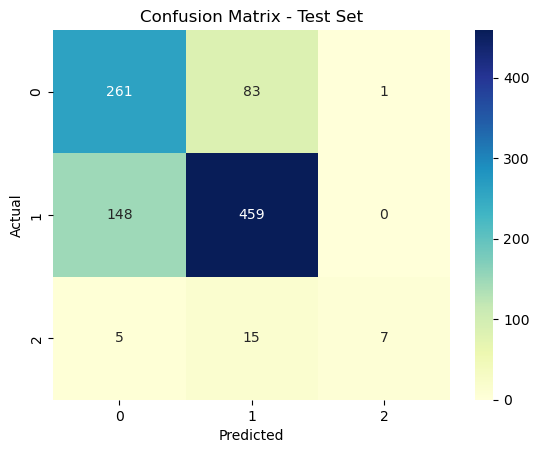

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred_gini), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()